Importing Packages

In [188]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

Global Variables:
Change these variables to depending on your data

In [189]:
a = 'v3_slow'
file = "02_slow_symmetry_axis_v3.txt" #file location of vector list file created in VMD
frames = 10000 #number of frames in the simulation from which teh vector list file was created
max_tau = 600 #max tau value, the largest "time window" that we are looking at #change this to 6 ns
x_max = max_tau/100 #converting max_tau to time (ns), the simulation was done at 2 fs, with a 5000 dcd frequency which leads to 100 frames/ns

Global Variables

In [190]:
#vector list
sv = []
#mean y value list 
y_mean = []
#contains the error values
y_err = []
#data frame that will contain the 99% confidence interval
df = pd.DataFrame({})

Functions

In [191]:
def read_data(): #note that "f" is defined previously as 
	#open the file
	f = open(file)
	reader = csv.reader(f,delimiter=' ',quoting=csv.QUOTE_NONNUMERIC) # change contents to floats, floats needed to use dot product function later on. 
	for row in list(reader)[1:]: #adding the "[1:]" tells it to skip the first row headers
		sv.append(row)
	return sv
	# for row in reader: # each row is a list
	# sv.append(row) #write each row to the sv array

In [192]:
def autoc():
	##rotational autocorrelation function is C(tau) = <u(t).u(t+tau)>
	for tau in range (0, max_tau, 1):
		y = []
		for t in range (0, frames-tau, 1):
			C = (np.dot(sv[t], sv[t+tau]))
			y.append(C)
		y_mean.append(np.mean(y)) #the y_mean is the y value used for graphing later on
		# y_sd.append(np.std(y))
		y_err.append(np.std(y)/np.sqrt((frames-tau)/300))
		### function parameters and function return values
	return y_mean

In [193]:
def create_df():
	global df
	df = df.append(y_err)
	df = df.rename(columns={0: "y error"})
	df.insert(0, "mean", y_mean)
	return df
	

In [194]:
def autoc_graph():
    #add a line for y=0
    x = np.linspace(0,x_max,max_tau)

    fig, ax = plt.subplots(dpi=300)
    ax.plot(x, df["mean"], '-', linewidth=0.5, color='black')
    # ax.fill_between(x, df["lower"], df["lower"], linewidth=0.5, alpha=0.6, color='steelblue')
    ax.fill_between(x, df["mean"]-df["y error"], df["mean"]+df["y error"], linewidth=0.5, alpha=0.6, color='steelblue')

    ax.set_xlabel('Time (ns)')

    # # naming the y axis
    ax.set_ylabel('Autocorrelation')

    # # giving a title to my graph
    ax.set_title('t3q Rotational Autocorrelation: {}'.format(a))

    plt.savefig('{}_error.png'.format(a), bbox_inches='tight')
    plt.savefig('{}_error.pdf'.format(a), bbox_inches='tight')
    plt.show()


Executing Functions

In [195]:
read_data()
autoc()
create_df()
# autoc_graph()

,mean,y error
0,1.000000,1.230267e-08
1,0.855695,8.252476e-02
2,0.797625,9.338589e-02
3,0.745250,1.012210e-01
4,0.703204,1.058858e-01
...,...,...
295,0.201305,9.408951e-02
296,0.198709,9.415791e-02
297,0.199590,9.406838e-02
298,0.199075,9.402164e-02


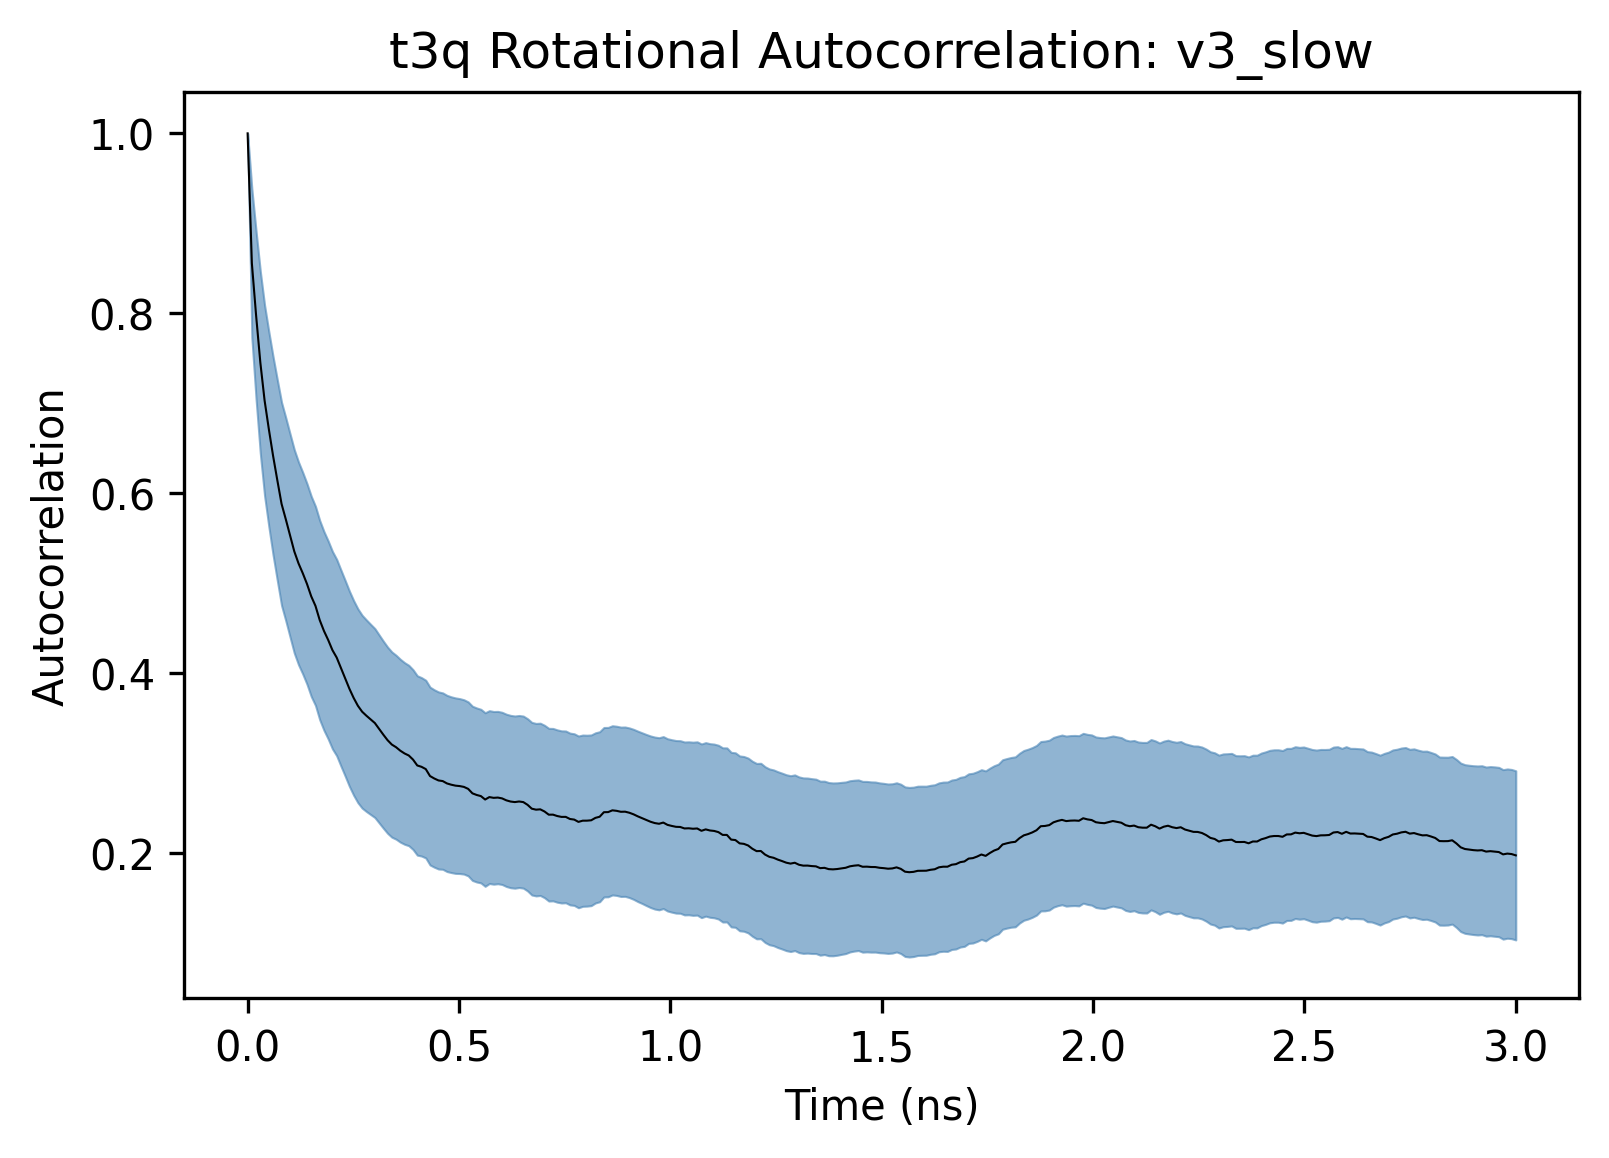

In [196]:
autoc_graph()